# Part 1: Cleaning the data

In [575]:
# Use to suppress Pandas Future warnings happen in below code.

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [576]:
# import essential libraries

# numpy and pandas for functions
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

#import matplotlib for graphs
import matplotlib.pyplot as plt

# import seaborn and set style for seaborn graphs
import seaborn as sns
sns.set(style='ticks', palette ='Set3')

# set the decimal places to only 3
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [577]:
# read the csv file
mmSales = pd.read_csv('DataSample/MM_Sales.csv')

# get the csv file information such as shape, count the rows of each columns, types of columns 
# and the differences of Null cells
print(mmSales.shape)
print(mmSales.count())
print(mmSales.dtypes)
print(mmSales.count()-mmSales.shape[0])

(50000, 14)
Region            50000
Country           50000
Item Type         49994
Sales Channel     50000
Order Priority    49985
Order Date        50000
Order ID          50000
Ship Date         50000
Units Sold        50000
Unit Price        50000
Unit Cost         50000
Total Revenue     50000
Total Cost        50000
Total Profit      50000
dtype: int64
Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID           object
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object
Region             0
Country            0
Item Type         -6
Sales Channel      0
Order Priority   -15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cos

For data cleaning portion, I decided I would try a different approach than the one shown in class. I did some research only and found out a pandas operation called replace and used it. The results were more than I expected. It first occured some errors, but after revising, I managed to pull it to the correct results. Here are the process

In [578]:
# create a copy of the sales to work on
salesClean = mmSales.copy()

In [579]:
# First step:

# Replace empty value by NaN, follow the format "df.replace(to_replace, value, inplace)".
# inplace is default false, but in this case, it's true to return the caller
salesClean["Country"].replace('', np.nan, inplace=True)
salesClean["Item Type"].replace('', np.nan, inplace=True)
salesClean["Order Priority"].replace('', np.nan, inplace=True)
salesClean["Order ID"].replace('', np.nan, inplace=True)

In [580]:
# Second step:

# Use dropna pd function to drop NaN values from data
# dropna function follows the format "df.dropna(subset, inplace)"
# subset to be our columns that need revised and inplace true to run the operation and returns None
salesClean.dropna(subset=['Country'], inplace=True)
salesClean.dropna(subset=['Item Type'], inplace=True)
salesClean.dropna(subset=['Order Priority'], inplace=True)
salesClean.dropna(subset=['Order ID'], inplace=True)

# print out the new count of rows from each columns to see how many nan rows have been omitted
print(salesClean.count())

Region            49979
Country           49979
Item Type         49979
Sales Channel     49979
Order Priority    49979
Order Date        49979
Order ID          49979
Ship Date         49979
Units Sold        49979
Unit Price        49979
Unit Cost         49979
Total Revenue     49979
Total Cost        49979
Total Profit      49979
dtype: int64


In [491]:
# Third step:
# After dropping all the nan values, I continue with third part of the requirements.

# Use pandas.to_numeric function to convert the column to numeric type
# notnull used to check if it's a number. If it is, it's TRUE. If it's not, it's FALSE. 
# variables name is as it's meanings.
isCountryNotNumber = pd.to_numeric(salesClean["Country"], errors='coerce').notnull()
isItemTypeNotNumber = pd.to_numeric(salesClean["Item Type"], errors='coerce').notnull()
isOrderIdNotNumber = pd.to_numeric(salesClean["Order ID"], errors='coerce').notnull()

In [495]:
# Fourth step:

# Use binary operators '~':
# First 2 rows, taking only strings, not number.
# Last row, taking only number, not string.
salesClean = salesClean[~(isCountryNotNumber)]
salesClean = salesClean[~(isItemTypeNotNumber)]
salesClean = salesClean[isOrderIdNotNumber]

# Use binary operator '|' means or
# Only column order priority need filter left, so if it has C,H, M, L, we take that row.
salesClean = salesClean[(salesClean["Order Priority"] == 'C') | 
                              (salesClean["Order Priority"] == 'H') | 
                              (salesClean["Order Priority"] == 'M') | 
                              (salesClean["Order Priority"] == 'L')]

print(salesClean.count())

Region            49971
Country           49971
Item Type         49971
Sales Channel     49971
Order Priority    49971
Order Date        49971
Order ID          49971
Ship Date         49971
Units Sold        49971
Unit Price        49971
Unit Cost         49971
Total Revenue     49971
Total Cost        49971
Total Profit      49971
dtype: int64


<ipython-input-495-d9c565eb83f3>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  salesClean = salesClean[~(isCountryNotNumber)]
<ipython-input-495-d9c565eb83f3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  salesClean = salesClean[~(isItemTypeNotNumber)]
<ipython-input-495-d9c565eb83f3>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  salesClean = salesClean[isOrderIdNotNumber]


In [496]:
# Put new data into a new csv file, we'll work on this file from now.
# Excluded index by using index=False

salesClean.to_csv('DataSample/MM_Sales_clean.csv', index=False)

# Part 2: Exploratory Data Analysis with Reports & Visualizations

## Question 1

In [497]:
# Rank the Top 10 countries we sell to the most to least along with the number of sales we've had with that country

# Read the MMSalesClean csv file as a dataframe
mmSalesDF = pd.read_csv('DataSample/MM_Sales_clean.csv')

# Use group by function to group all the country together and count the rows of each country using count() function on Order ID column.
# After that, use the nlargest() function to sort the list into descending order and take only top 10 countries
# with highest number of sales.
mostSoldCount = mmSalesDF.groupby('Country').count()[['Order ID']].nlargest(10,'Order ID')
print(mostSoldCount)

                                  Order ID
Country                                   
Trinidad and Tobago                    321
Guinea                                 318
Cape Verde                             314
Maldives                               311
Finland                                310
Democratic Republic of the Congo       308
Samoa                                  306
Malta                                  305
China                                  303
South Sudan                            302


In [478]:
# Create the dataframe from the result of top 10 countries of sales above using pandas
# with 2 columns: Country and Number of Sales

top10DF = pd.DataFrame([['Trinidad and Tobago ',321], 
                        ['Guinea',318], 
                        ['Cape Verde',314], 
                        ['Maldives',311], 
                        ['Finland',310],
                        ['Democratic Republic of the Congo ',308],
                        ['Samoa',306],['Malta',305],['China',303],
                        ['South Sudan',302]], columns=['Country', 'Number of Sales'])
print(top10DF)

                             Country  Number of Sales
0               Trinidad and Tobago               321
1                             Guinea              318
2                         Cape Verde              314
3                           Maldives              311
4                            Finland              310
5  Democratic Republic of the Congo               308
6                              Samoa              306
7                              Malta              305
8                              China              303
9                        South Sudan              302


### Question 1 - 1

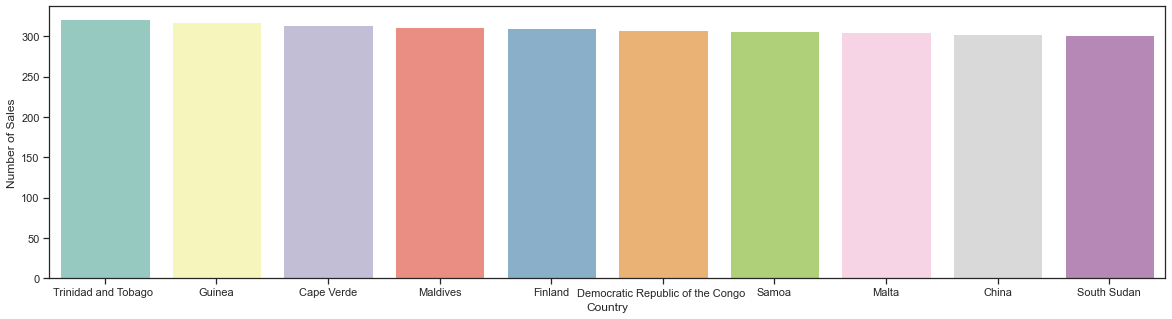

In [479]:
# Use Seaborn or Matplotlib to create a chart of your choice showing these top 10 values by country.

# Plotting a bar chart graph with seaborn, having countries on x-axis and number of sales on y-axis
plt.figure(figsize=(20,5))
y = top10DF['Number of Sales']
x = top10DF['Country']
ax = sns.barplot(x, y)

### Question 1 - 1 - 1

Which country should we build a shipping center in based on most sales and lack of shipping center? 
    We should build a shipping center in country 'Cape Verde', because it's has the third highest number of sales but still lack of a shipping center.

### Question 1 - 2

In [450]:
# Create a new blank txt file using with open:
with open('DataSample/MM_Ranking.txt', "w+", newline='') as writer:
    writer.write('')

In [451]:
# Using append function to add in the first row:
with open('DataSample/MM_Ranking.txt', "a+") as writer:
    writer.write('Countries Most Sale Transaction:\n')

In [452]:
# Create a list with top 10 countries data. 
top10Countries = ['Trinidad and Tobago: 321','Guinea: 318','Cape Verse: 314','Maldives: 311', 
                 'Finland: 310', 'Democratic Republic of the Congo: 308', 'Samoa: 306',
                 'Malta: 305', 'China: 303','South Sudan": 302']

# Use open() function to append new lines into the txt file
# Use for loop to print out every lines in the list into the txt file.
with open('DataSample/MM_Ranking.txt', "a+") as writer:
    for line in top10Countries:
        writer.write(f'{line}\n')

In [453]:
# Use open() function with append to write in the answer for the question:
with open('DataSample/MM_Ranking.txt', "a+") as writer:
    writer.write('We should build a shipping center in country Cape Verde, because it has the third highest number of sales but still lack of a shipping center.\n')

## Question 2

### Question 2 - 1

In [454]:
# Determine the count for how many online and offline orders we take

# Use groupby function to group the Sales Channel column into 2 part: Offline and Online
# and count() function to count the rows of each part
offOnOrders = mmSalesDF.groupby('Sales Channel').count()[['Order ID']]
print(offOnOrders)

               Order ID
Sales Channel          
Offline           19788
Online            30183


### Question 2 - 2

In [456]:
# Determine the count of the different Order Priority types.

# Use groupby function to group the Order Priority column into 4 part: C, H, M, L
# and count() function to count the rows of each part
orderPriorTypes = mmSalesDF.groupby('Order Priority').count()[['Order ID']]
print(orderPriorTypes)

                Order ID
Order Priority          
C                   5012
H                  15094
L                   9984
M                  19881


### Question 2 - 3

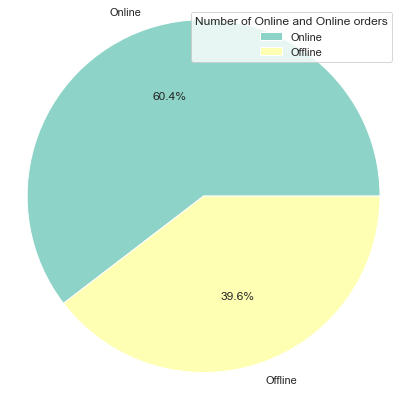

In [455]:
# Create a pie chart for showing the differences in Sales Channels' values

# Create 2 variables with data from the table above: 
# my_data holds counts of online and offline orders; my_labels holds the 2 categories online and offline
my_data = [30183,19788]
my_labels = 'Online','Offline'

# Define the size
plt.figure(figsize=(7,7))

# Create the pie, autopct used to display the percent value using Python string formatting
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')

# Pie chart title
plt.legend(loc=1,title="Number of Online and Online orders")
plt.axis('equal')
plt.show()

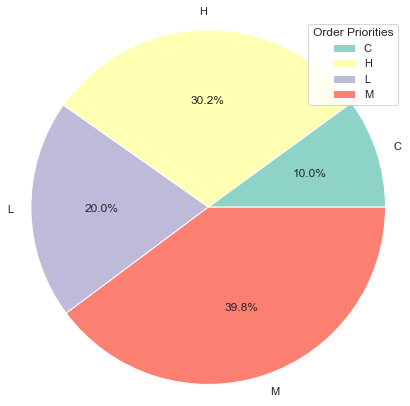

In [457]:
# Create a pie chart for showing the differences in Order Priority' values

# Create 2 variables with data from the table above: 
# my_data holds counts of C, H, M, L; my_labels holds the 4 categories C, H, M, L
my_data = [5012,15094,9984,19881]
my_labels = 'C','H','L','M'

# Define the size
plt.figure(figsize=(7,7))

# Create the pie, autopct used to display the percent value using Python string formatting
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')

# Pie chart title
plt.legend(loc=1,title="Order Priorities")
plt.axis('equal')
plt.show()

### Question 2 - 4

In [458]:
# Add the results of the highest sales channel type and the highest order priority to the 
# file MM_Rankings.txt.

# Create a list with online and Offline data. 
onOffList = ['Sales Channels:',
             'Online: 30183',
             'Offline: 19788',
             'We do more online sales.']

# Use open() function to append new lines into the txt file
# Use for loop to print out every lines in the list into the txt file.
with open('DataSample/MM_Ranking.txt', "a+") as writer:
    for line in onOffList:
        writer.write(f'{line}\n')

In [459]:
# Create a list with Order Priority data. 
orderPriorList = ['Order Priorities:',
                  'L: 9984',
                  'M: 19881',
                  'H: 15094',
                  'C: 5012',
                  'We do more M order priorities.']

# Use open() function to append new lines into the txt file
# Use for loop to print out every lines in the list into the txt file.
with open('DataSample/MM_Ranking.txt', "a+") as writer:
    for line in orderPriorList:
        writer.write(f'{line}\n')

## Question 3

### Question 3 - 1

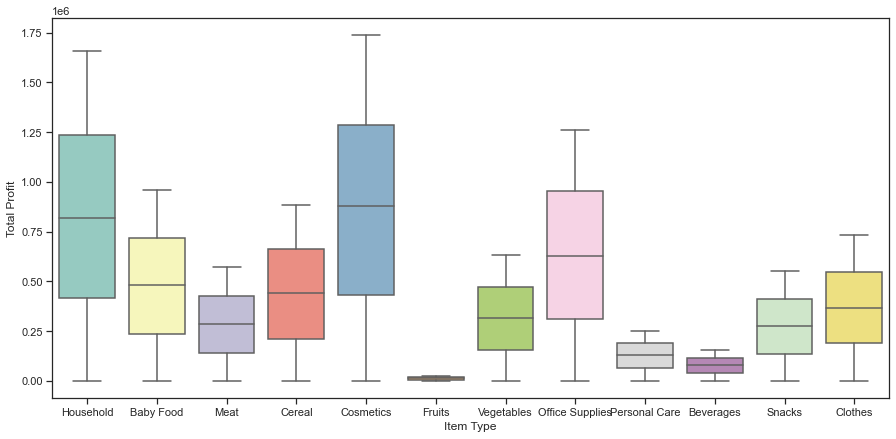

In [501]:
#Create a Boxplot using Seaborn showing the Total Profits DISTRIBUTION by Item Type.

# Create a boxplot with 2 columns Item Type on x-axis and Total Profit on y-axis, take the data from MMSalesDF
#Define graph size
plt.figure(figsize=(15,7))
ax = sns.boxplot(x="Item Type", y="Total Profit", data=mmSalesDF)

### Question 3 - 2

In [461]:
#Use Python to determine the sum of Total Profit by Item Type.

# Use groupby function to group the Item Type by each items. 
# and sum() function to sum the total profit of each item types
TotalProfitsDist = mmSalesDF.groupby('Item Type').sum()[['Total Profit']]
print(TotalProfitsDist)

                  Total Profit
Item Type                     
Baby Food       1942865748.120
Beverages        327559249.080
Cereal          1824726412.290
Clothes         1520832019.680
Cosmetics       3638407966.750
Fruits            51010570.920
Household       3401180998.060
Meat            1196342404.400
Office Supplies 2605440187.500
Personal Care    535250525.600
Snacks          1149715758.720
Vegetables      1322639660.240


### Question 3 - 3

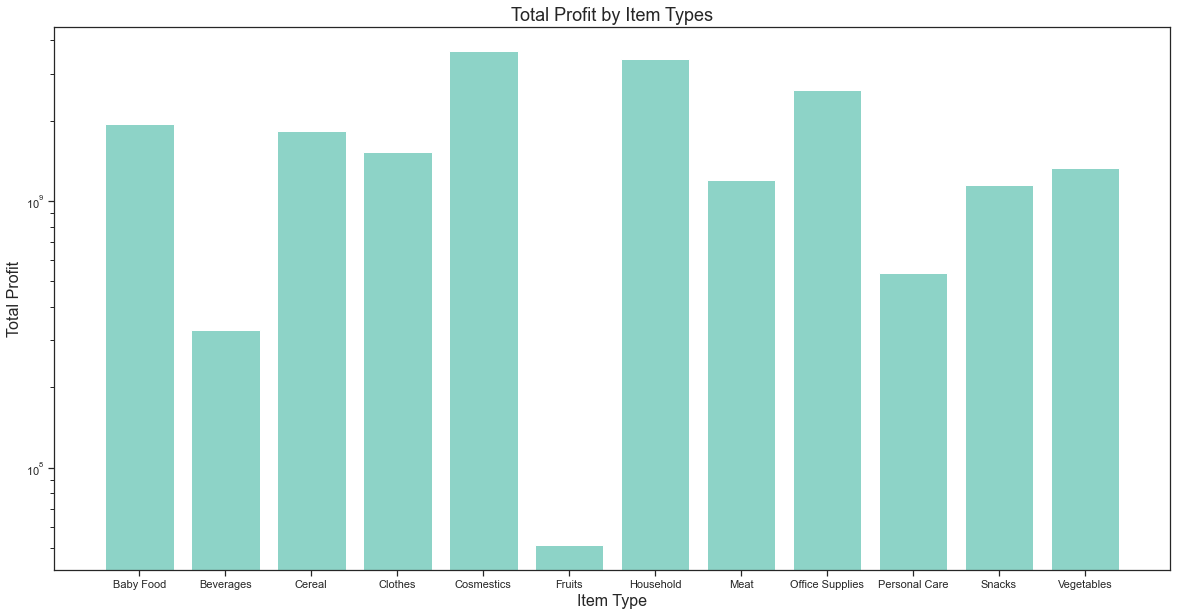

In [462]:
# Now create a chart type of your choice (Seaborn or Matplotlib) 
# showing the sums of the different Item Types.

# Create 2 variables with data from the table above: 
# Sum_of_Profit holds the sum of Total Profit of each item type; 
# Item_Type holds the item type as categories
Item_Type = ['Baby Food','Beverages','Cereal','Clothes','Cosmestics',
        'Fruits','Household','Meat','Office Supplies',
        'Personal Care','Snacks','Vegetables']
Sum_of_Profit = [1942865748.120, 327559249.080, 1824726412.290, 1520832019.680,
                3638407966.750, 51010570.920, 3401180998.060, 1196342404.400,
                2605440187.500, 535250525.600, 1149715758.720, 1322639660.240]

# Define the graph size
plt.figure(figsize=(20,10))

# Create the bar graph using matplotlib with Item Type on x-axis, Total profit on y-axis
plt.bar(Item_Type, Sum_of_Profit)

# Because the number of the total profit is too large, use yscale function to have numbers in logarithm format
plt.yscale('log')

# Create the graph name, xlabel and ylabel name
plt.title('Total Profit by Item Types',fontsize=18)
plt.xlabel('Item Type',fontsize=16)
plt.ylabel('Total Profit', fontsize=16)
plt.show()

### Question 3 - 4

In [463]:
# Rank the top 3 item types we did the most sales (brought in most profit) in to the least sales. 
# List the item types and the amount sold.

# Create a dataframe with sum_of_profit columnn data, index would be the Item Type column, and the column is Sum of Profit
totalProfitSort = pd.DataFrame(Sum_of_Profit, index = Item_Type, columns = ['Sum of Profit'])
totalProfitSort

# Use sort_values() function to sort the result data in descending order
# Get only 3 top value by using head() function
totalProfitSort.sort_values(by=['Sum of Profit'], ascending = False).head(3)

,Sum of Profit
Cosmestics,3638407966.750
Household,3401180998.060
Office Supplies,2605440187.500


### Question 3 - 5

In [464]:
# Add the results of the top 3 item types to the file MM_Rankings.txt.

# Create a list with Top 3 Item Type values above. 
top3Items = ['Highest Selling Items:',
             'Cosmestics: 3638407966.750',
             'Household: 3401180998.060',
             'Office Supplies: 2605440187.500',
             'We sold Cosmetics the most.']

# Use open() function to append new lines into the txt file
# Use for loop to print out every lines in the list into the txt file.
with open('DataSample/MM_Ranking.txt', "a+") as writer:
    for line in top3Items:
        writer.write(f'{line}\n')

### Question 3 - 6

#### Provide a markdown section discussing the results of the boxplots. Discuss what is being shown in the boxplots amd do some business analytics around what sort of use this sort of chart might help in making decisions. Are there any unexpected results? Discuss them.

Using the graph, we can compare the range and distribution of the Total Profit for all of the Item Type. These boxplots were created on same number of sample size (N). Most of the boxplots are not skewed (normally contributed). There are also no outliers, but the median(center of the boxplot) of each item type varies differently on different scale. These boxplots of item types spread differently too, some have a large spreading area, but some have smaller. 

Go into details:
- Some boxplots are comparatively short: meat, fruit, personal care and beverages, vegetable, snack and clothes. Which means the total profit of those types are the least, they are not the most important type in bringing back profit for MM.
- Some boxplots are comparatively tall: householf, cosmetic and office supply. Which means these 3 types are the most profitable, which are important in the MM Sales overall.
- The highest boxplot is cosmetic. It brings back the most profit
- The lowest boxplot is fruit. It brings back the lease profit.

In short, the profits of each items are not distributed evenly, which can be considered as hugely different.
In order to bring back more profit, I would suggest balance out the profit between item types. Push the number of sales by supporting more on some least profitable item types.
No outliers mean no unexpected event had happened, the sales were recorded in plan. Therefore, if we can create a better plan, the profit would increase as well.

## Question 4

### Question 4 - 1

In [521]:
#Produce the data above for the sum of the requested columns.

# Use pandas sum() function on dataframe to find the sum of each columns
# Set each column sum to different variables
TotalUnitsSold = mmSalesDF['Units Sold'].sum()
TotalUnitsCost = mmSalesDF['Unit Cost'].sum()
TotalRevenue = mmSalesDF['Total Revenue'].sum()
TotalCost = mmSalesDF['Total Cost'].sum()
TotalProfit = mmSalesDF['Total Profit'].sum()

### Question 4 - 2

In [522]:
#Produce the data above for the average of the requested columns.

# Use pandas mean() function on dataframe to find the average of each columns
# Set each column average to different variables
AvgUnitsSold = mmSalesDF['Units Sold'].mean()
AvgUnitsCost = mmSalesDF['Unit Cost'].mean()
AvgTotalRevenue = mmSalesDF['Total Revenue'].mean()
AvgTotalCost = mmSalesDF['Total Cost'].mean()
AvgTotalProfit = mmSalesDF['Total Profit'].mean()

### Question 4 - 3

In [523]:
#Produce the data above for the maximum of the requested columns. 

# Use pandas max() function on dataframe to find the maximum of each columns
# Set each column maximum to different variables
MaxUnitsSold = mmSalesDF['Units Sold'].max()
MaxUnitsCost = mmSalesDF['Unit Cost'].max()
MaxTotalRevenue = mmSalesDF['Total Revenue'].max()
MaxTotalCost = mmSalesDF['Total Cost'].max()
MaxTotalProfit = mmSalesDF['Total Profit'].max()

### Question 4 - 4

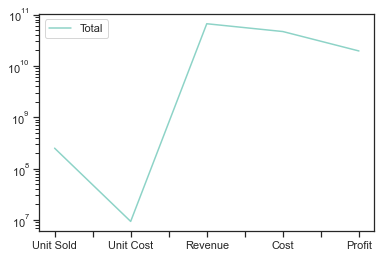

In [524]:
#Create two line plots using Seaborn or Matplotlib for the sums

# Create a pandas dataframe with variables above, index is the column names
df = pd.DataFrame({
   'Total': [TotalUnitsSold, TotalUnitsCost, TotalRevenue, TotalCost, TotalProfit],
   }, index=['Unit Sold', 'Unit Cost', 'Revenue', 'Cost', 'Profit'])

# Create the line plot using matplotlib
lines = df.plot.line()

# Because the number of the total profit is too large, use yscale function to have numbers in logarithm format
plt.yscale('log')

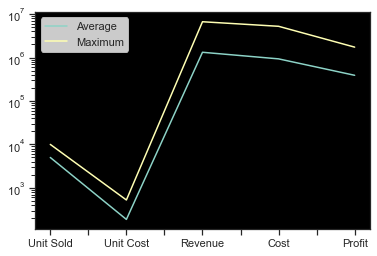

In [525]:
# Create two line plots using Seaborn or Matplotlib,one for both the averages and the maximums.

# Create a pandas dataframe with variables above, index is the column names, this one includes both average and maximum data
df1 = pd.DataFrame({
    'Average': [AvgUnitsSold, AvgUnitsCost, AvgTotalRevenue, AvgTotalCost, AvgTotalProfit],
    'Maximum': [MaxUnitsSold, MaxUnitsCost, MaxTotalRevenue, MaxTotalCost, MaxTotalProfit],
   }, index=['Unit Sold', 'Unit Cost', 'Revenue', 'Cost', 'Profit'])

# Create the line plot using matplotlib
lines = df1.plot.line()

# Set background to black because the yellow line is hard to see in white background
lines.set_facecolor('xkcd:black')

# Because the number of the total profit is too large, use yscale function to have numbers in logarithm format
plt.yscale('log')

### Question 4 - 5

In [567]:
#Now you will save these calculations below to a text file called MM_Calc.txt.

# Create a new txt file with open() function, write blank to the file, having newline after every line
with open('DataSample/MM_Calc.txt', "w+", newline='') as writer:
    writer.write('')

In [568]:
#Create a list of sum variables, cast the variable to string to be the same with the first part
# When print out to the txt file, it's also be on the same line
sumsList = ['Sums:', 
            'Units sold: ' + str(TotalUnitsSold), 
            'Unit cost: ' + str(TotalUnitsCost), 
            'Total revenue: ' + str(TotalRevenue), 
            'Total cost: ' + str(TotalCost),
            'Total profit: ' + str(TotalProfit)]

# Use open() function to append new lines into the txt file
# Use for loop to print out every lines in the list into the txt file.
with open('DataSample/MM_Calc.txt', "a+") as writer:
    for line in sumsList:
        writer.write(f'{line}\n')

In [569]:
#Create a list of average variables, cast the variable to string to be the same with the first part
# When print out to the txt file, it's also be on the same line
averagesList = ['Averages:',
                'Units sold: ' + str(AvgUnitsSold), 
                'Unit cost: ' + str(AvgUnitsCost), 
                'Total revenue: ' + str(AvgTotalRevenue), 
                'Total cost: ' + str(AvgTotalCost),
                'Total profit: ' + str(AvgTotalProfit)]

# Use open() function to append new lines into the txt file
# Use for loop to print out every lines in the list into the txt file.
with open('DataSample/MM_Calc.txt', "a+") as writer:
    for line in averagesList:
        writer.write(f'{line}\n')

In [570]:
#Create a list of maximum variables, cast the variable to string to be the same with the first part
# When print out to the txt file, it's also be on the same line
maxList = ['Maximums:',
           'Units sold: ' + str(MaxUnitsSold), 
           'Unit cost: ' + str(MaxUnitsCost), 
           'Total revenue: ' + str(MaxTotalRevenue), 
           'Total cost: ' + str(MaxTotalCost),
           'Total profit: ' + str(MaxTotalProfit)]

# Use open() function to append new lines into the txt file
# Use for loop to print out every lines in the list into the txt file.
with open('DataSample/MM_Calc.txt', "a+") as writer:
    for line in maxList:
        writer.write(f'{line}\n')

# Part 3

In [590]:
# Please return this as a dictionary of lists with the keys of the dictionary being the name 
# of each Region and the list attached to that being all the countries we sell to for that region.

# Use groupby() function to group different regions in the region column, also get countries in each region
# .unique() to remove any duplicates might have in each region
# Apply the list above to the dictionary 
regionByCountry = mmSalesDF.groupby(['Region'])['Country'].unique().apply(list).to_dict()

In [591]:
#Write this out to a CSV file called Countries_By_Region.csv

# Create a dataframe from the dictionary "regionByCountry" above
# Oriented it by index and then transpose the x to y and likewise
regionDF = pd.DataFrame.from_dict(regionByCountry, orient='index').transpose()

# Put the dataframe into csv by .to_csv() function, remove the index(0,1,2,3,etc) by using index=False
regionDF.to_csv("DataSample/Countries_By_Region.csv", index=False)